In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

In [2]:
def fetch_data(ticker, start, end):
    """
    Fetch historical stock data using yfinance.
    """
    data = yf.download(ticker, start=start, end=end)
    data.dropna(inplace=True)
    return data

# Example usage
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2023-01-01"
data = fetch_data(ticker, start_date, end_date)
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2022-01-03 00:00:00+00:00  179.076584  182.009995  182.880005  177.710007   
2022-01-04 00:00:00+00:00  176.803818  179.699997  182.940002  179.119995   
2022-01-05 00:00:00+00:00  172.100861  174.919998  180.169998  174.639999   
2022-01-06 00:00:00+00:00  169.227905  172.000000  175.300003  171.639999   
2022-01-07 00:00:00+00:00  169.395157  172.169998  174.139999  171.029999   

Price                            Open     Volume  
Ticker                           AAPL       AAPL  
Date                                              
2022-01-03 00:00:00+00:00  177.830002  104487900  
2022-01-04 00:00:00+00:00  182.630005   99310400  
2022-01-05 00:00:00+00:00  179.610001   94537600  
2022-01-06 00:00:00+00:00  172.699997   96904000  
2022-01-07 00:00:00+00:00 

In [3]:
# Function to calculate Bollinger Bands
def calculate_bollinger_bands(data, window=20):
    data['SMA'] = data['Close'].rolling(window=window).mean()
    data['StdDev'] = data['Close'].rolling(window=window).std()
    data['Upper Band'] = data['SMA'] + (2 * data['StdDev'])
    data['Lower Band'] = data['SMA'] - (2 * data['StdDev'])
    return data.dropna(subset=['SMA', 'Upper Band', 'Lower Band'])

In [10]:
# Function to identify buy and sell signals
def generate_signals(data):
    # Debug: Check for required columns before generating signals
    required_columns = ['Close', 'Lower Band', 'Upper Band']
    missing_columns = [col for col in required_columns if col not in data.columns]
    if missing_columns:
        raise KeyError(f"Missing required columns for signal generation: {missing_columns}")

    # Generate Buy and Sell Signals
    data['Buy Signal'] = np.where(data['Close'] < data['Lower Band'], data['Close'], np.nan)
    data['Sell Signal'] = np.where(data['Close'] > data['Upper Band'], data['Close'], np.nan)


    # Debug: Check if signals were created
    print("Signals created. Columns:", data.columns)
    return data

In [5]:
print(data.columns)

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [15]:
# Function to plot results
def plot_results(data):
    # Debug: Verify required columns for plotting
    required_columns = ['Close', 'SMA', 'Upper Band', 'Lower Band', 'Buy Signal', 'Sell Signal']
    for col in required_columns:
        if col not in data.columns:
            print(f"Missing column in data for plotting: {col}")
    
    # Plotting
    plt.figure(figsize=(14, 8))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['SMA'], label='SMA', linestyle='--', color='orange')
    plt.plot(data['Upper Band'], label='Upper Band', linestyle='--', color='green')
    plt.plot(data['Lower Band'], label='Lower Band', linestyle='--', color='red')
    
    # Buy and Sell Signals
    if 'Buy Signal' in data.columns:
        plt.scatter(data.index, data['Buy Signal'], label='Buy Signal', marker='^', color='green')
    if 'Sell Signal' in data.columns:
        plt.scatter(data.index, data['Sell Signal'], label='Sell Signal', marker='v', color='red')

    plt.title('Bollinger Bands Strategy with Buy/Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [16]:
# Main script
symbol = 'AAPL'  # Replace with your stock symbol
start_date = '2020-01-01'
end_date = '2023-12-31'

# Download data
data = yf.download(symbol, start=start_date, end=end_date)

# Check if data is available
if not data.empty:
    try:
        # Calculate Bollinger Bands
        data = calculate_bollinger_bands(data)
        
        # Generate buy and sell signals
        data = generate_signals(data)

        # Plot results
        plot_results(data)
    except KeyError as e:
        print("KeyError encountered:", e)
        print("Available columns in data:", data.columns)
    except Exception as e:
        print("An error occurred:", e)
else:
    print("No data retrieved. Check the stock symbol and date range.")

[*********************100%***********************]  1 of 1 completed

KeyError encountered: ['SMA', 'Upper Band', 'Lower Band']
Available columns in data: MultiIndex([( 'Adj Close', 'AAPL'),
            (     'Close', 'AAPL'),
            (      'High', 'AAPL'),
            (       'Low', 'AAPL'),
            (      'Open', 'AAPL'),
            (    'Volume', 'AAPL'),
            (       'SMA',     ''),
            (    'StdDev',     ''),
            ('Upper Band',     ''),
            ('Lower Band',     '')],
           names=['Price', 'Ticker'])


Missing column in data for plotting: Buy Signal
Missing column in data for plotting: Sell Signal


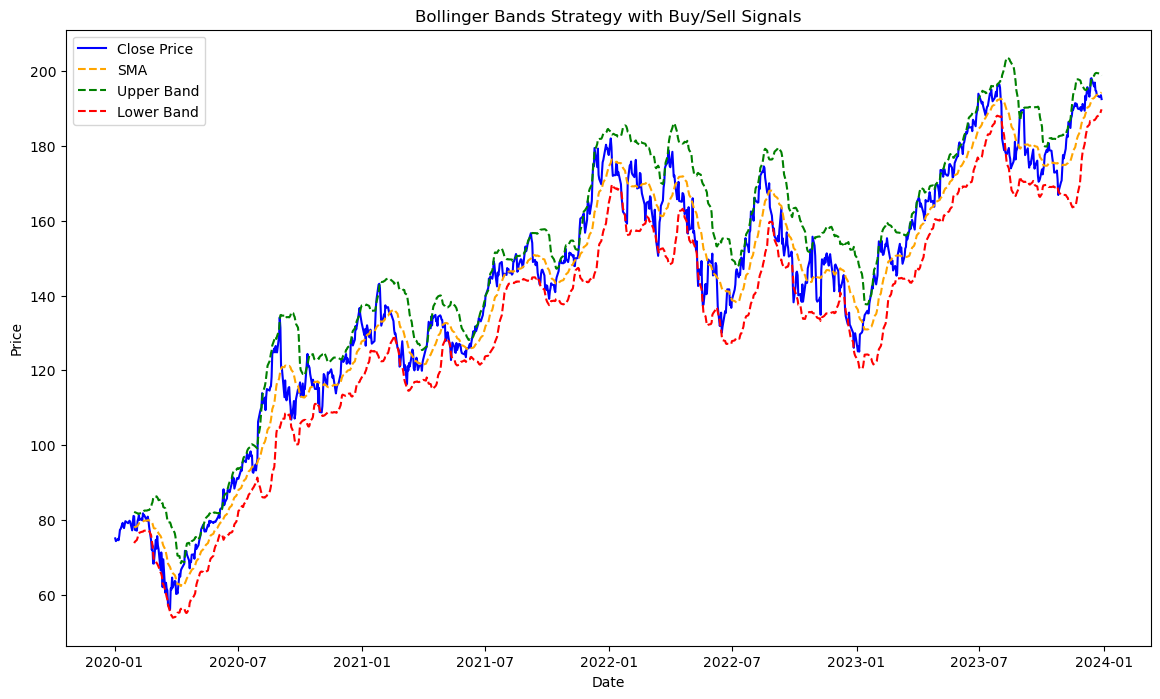

In [17]:
plot_results(data)